In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import the dataset

df =pd.read_excel("/content/amazon_great_indian_sale_mobile_dataset_2025.xlsx")

In [5]:
# Preview the data
print (df.head())

         ASIN                                       Product_Name  Price  \
0  B0FLV2S332  realme C73 5G Smartphone 6.67 Inch Screen 120H...  10544   
1  B0CWPCFSM3  Samsung Galaxy A55 5G (Awesome Iceblue, 8GB RA...  25999   
2  B0D78VSVGS         Redmi A3X Midnight Black 4GB RAM 128GB ROM   6691   
3  B0CWPBBQ3M  Samsung Galaxy A55 5G (Awesome Navy, 8GB RAM, ...  25999   
4  B0CXMD9YX5  Samsung Galaxy A35 5G (Awesome Navy, 8GB RAM, ...  18565   

   Rating  Review_Count  
0     4.0             0  
1     4.2          2866  
2     3.9           101  
3     4.2          2866  
4     4.2           261  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ASIN          800 non-null    object 
 1   Product_Name  800 non-null    object 
 2   Price         800 non-null    int64  
 3   Rating        800 non-null    float64
 4   Review_Count  800 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 31.4+ KB
None


In [8]:
print(df.describe())

               Price      Rating   Review_Count
count     800.000000  800.000000     800.000000
mean    16464.646250    4.001500    3923.023750
std     29189.082591    0.409399   16214.085507
min        53.000000    1.000000       0.000000
25%       471.500000    3.800000      97.750000
50%      1899.000000    4.000000     516.000000
75%     18420.250000    4.300000    1984.000000
max    179999.000000    5.000000  158438.000000


In [9]:
# Checking for missing values
print(df.isnull().sum())

ASIN            0
Product_Name    0
Price           0
Rating          0
Review_Count    0
dtype: int64


In [11]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
#Rename columns for convenience
df.columns = ['ASIN','Product_Name','Price','Rating','Review_Count']

In [15]:
#Convert data types
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'],errors='coerce')
df['Review_Count'] = pd.to_numeric(df['Review_Count'],errors='coerce')

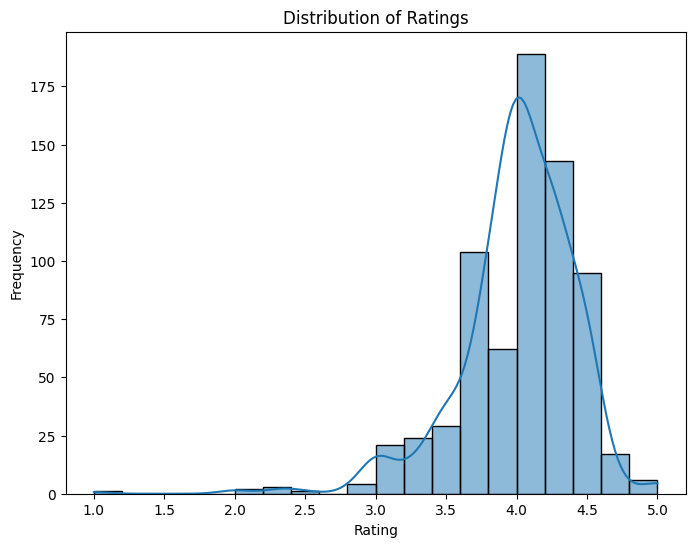

In [16]:
#Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

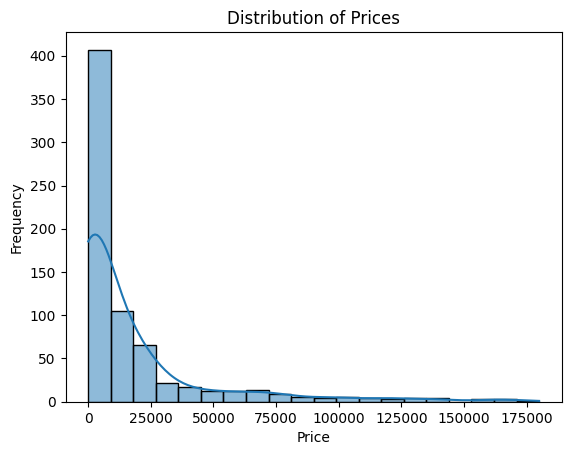

In [17]:
#Distribution of Prices
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

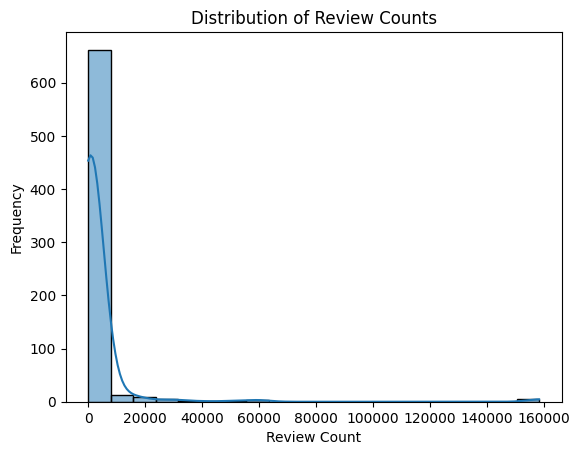

In [19]:
#Distribution of Review Counts
sns.histplot(df['Review_Count'], bins=20, kde=True)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

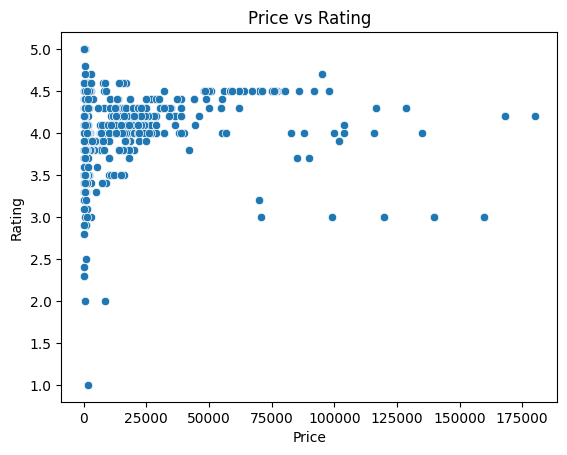

In [20]:
#Price Vs Rating
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

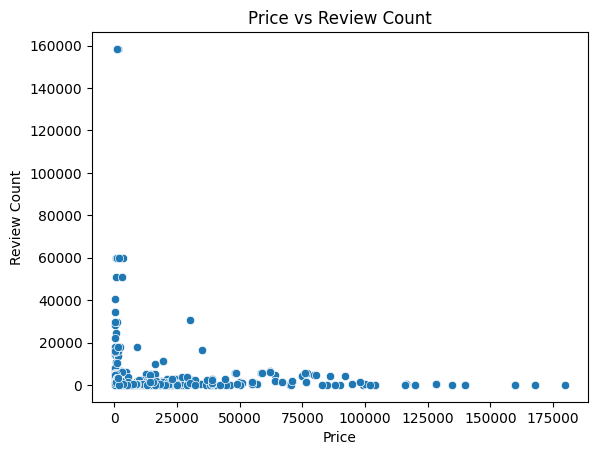

In [21]:
#Price Vs Review Count
sns.scatterplot(x='Price', y='Review_Count', data=df)
plt.title('Price vs Review Count')
plt.xlabel('Price')
plt.ylabel('Review Count')
plt.show()

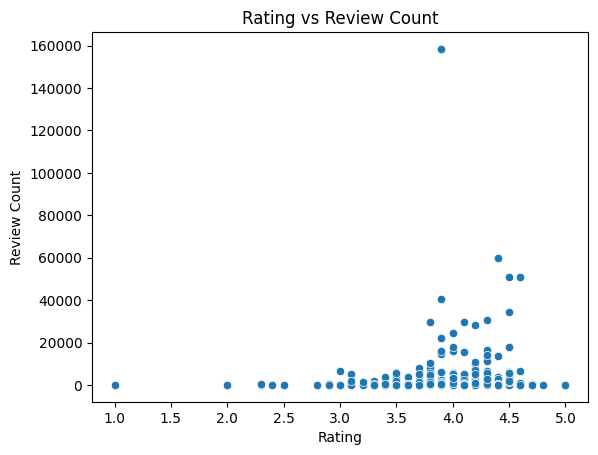

In [22]:
#Rating Vs Review Count
sns.scatterplot(x='Rating', y='Review_Count', data=df)
plt.title('Rating vs Review Count')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.show()

In [23]:
#Extracrt brand from product name
df['Brand'] = df['Product_Name'].str.split().str[0]

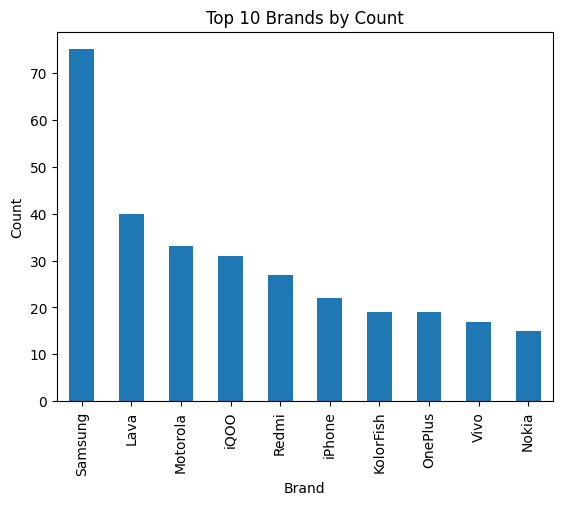

In [24]:
#Top brands by count
top_brands = df['Brand'].value_counts().head(10)
top_brands.plot(kind='bar')
plt.title('Top 10 Brands by Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

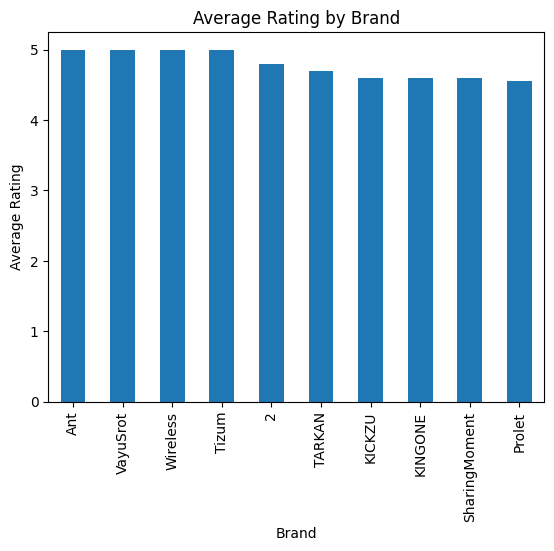

In [25]:
#Average rating by brands
avg_rating_by_brand = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False).head(10)
avg_rating_by_brand.plot(kind='bar')
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()